In [2]:
%load_ext autoreload
%autoreload 2
import pandas as pd
import numpy as np
import seaborn as sns
import script_test
import matplotlib.pyplot as plt
from itertools import product

In [3]:
df = pd.read_csv('data/sample_data.csv')
df.head()

,space,rent
0,20,13.958824
1,25,11.533805
2,28,14.269547
3,30,18.722680
4,36,19.602674


<Axes: xlabel='space', ylabel='rent'>

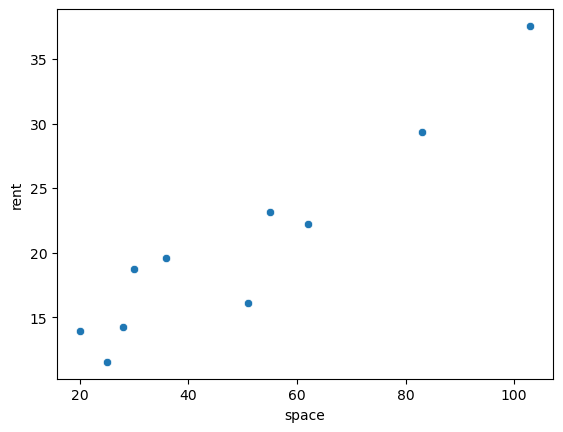

In [4]:
sns.scatterplot(data=df, x=df['space'], y=df['rent'])

In [5]:
x = df['space'].values
y = df['rent'].values

# script_test.cost_func(5, 7, x, y)
print(x)
print(y)
script_test.test(2, 3, x, y)

[ 20  25  28  30  36  51  55  62  83 103]
[13.9588237  11.53380496 14.26954729 18.7226796  19.60267397 16.06816636
 23.18359859 22.21259504 29.35701011 37.56512884]


array([ 2307.95461985,  4285.82269322,  5145.25784661,  5369.56568536,
        8171.67655329, 19302.05439847, 20683.1573157 , 27485.46364278,
       49125.61496681, 74766.62876675])

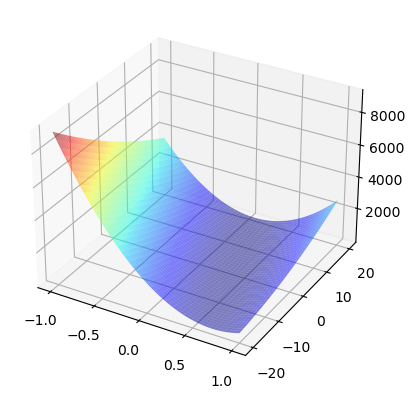

In [6]:
n0 = n1 = 300
max_theta_0 = 1
min_theta_0 = -1
max_theta_1 = 20
min_theta_1 = -20

theta_0 = np.linspace(min_theta_0, max_theta_0, n0)
theta_1 = np.linspace(min_theta_1, max_theta_1, n1)

theta_0_ax, theta_1_ax = np.meshgrid(theta_0, theta_1)
theta_0_ax
z = [script_test.cost_func(*params, x=x, y=y) for params in list(product(theta_1, theta_0))]
Z = np.array(z).reshape(n0, n1)
ax = plt.axes(projection='3d')
ax.plot_surface(theta_0_ax, theta_1_ax, Z, cmap='jet', alpha=0.5)

In [7]:
list(product(theta_1, theta_0))

[(-20.0, -1.0),
 (-20.0, -0.9933110367892977),
 (-20.0, -0.9866220735785953),
 (-20.0, -0.979933110367893),
 (-20.0, -0.9732441471571907),
 (-20.0, -0.9665551839464883),
 (-20.0, -0.959866220735786),
 (-20.0, -0.9531772575250836),
 (-20.0, -0.9464882943143813),
 (-20.0, -0.939799331103679),
 (-20.0, -0.9331103678929766),
 (-20.0, -0.9264214046822743),
 (-20.0, -0.919732441471572),
 (-20.0, -0.9130434782608696),
 (-20.0, -0.9063545150501673),
 (-20.0, -0.8996655518394648),
 (-20.0, -0.8929765886287625),
 (-20.0, -0.8862876254180602),
 (-20.0, -0.8795986622073578),
 (-20.0, -0.8729096989966555),
 (-20.0, -0.8662207357859532),
 (-20.0, -0.8595317725752508),
 (-20.0, -0.8528428093645485),
 (-20.0, -0.8461538461538461),
 (-20.0, -0.8394648829431438),
 (-20.0, -0.8327759197324415),
 (-20.0, -0.8260869565217391),
 (-20.0, -0.8193979933110368),
 (-20.0, -0.8127090301003345),
 (-20.0, -0.8060200668896321),
 (-20.0, -0.7993311036789298),
 (-20.0, -0.7926421404682275),
 (-20.0, -0.785953177257525

In [21]:

theta_0_init = -5
theta_1_init = -0.5
theta_0_hist = [theta_0_init]
theta_1_hist = [theta_1_init]
alpha = 0.00005

def calc_ldm_theta_0(theta_0: int, theta_1: int, x: int, y: int, alpha: int):
  return theta_0 - alpha * 2 * np.mean((theta_0 + theta_1 * x) - y)

def calc_ldm_theta_1(theta_0: int, theta_1: int, x: int, y: int, alpha: int):
  return theta_1 - alpha * 2 * np.mean(((theta_0 + theta_1 * x) - y) * x)


for _ in range(100000):
  theta_0 = theta_0_hist[-1]
  theta_1 = theta_1_hist[-1]
  theta_0_ldm = calc_ldm_theta_0(theta_0, theta_1, x, y, alpha)
  theta_1_ldm = calc_ldm_theta_1(theta_0, theta_1, x, y, alpha)
  theta_0_hist.append(theta_0_ldm)
  theta_1_hist.append(theta_1_ldm)






In [22]:
theta_0_hist

[-5,
 -4.994970259715448,
 -4.991418224975326,
 -4.988886091809614,
 -4.987057887798836,
 -4.985715531457436,
 -4.984708504792658,
 -4.98393292156176,
 -4.983317080360577,
 -4.98281149348771,
 -4.982382004951107,
 -4.982005040574548,
 -4.981664329661398,
 -4.9813486423147255,
 -4.981050227754824,
 -4.980763736459202,
 -4.9804854762327455,
 -4.980212898753649,
 -4.979944245191764,
 -4.979678301617396,
 -4.97941423018652,
 -4.979151452626256,
 -4.978889569817528,
 -4.978628306291694,
 -4.978367471922596,
 -4.978106935486734,
 -4.977846606414722,
 -4.977586422196303,
 -4.977326339687388,
 -4.977066329110255,
 -4.976806369912538,
 -4.9765464479091275,
 -4.976286553309546,
 -4.97602667935645,
 -4.975766821385943,
 -4.975506976179005,
 -4.975247141513859,
 -4.974987315857014,
 -4.974727498150032,
 -4.974467687662351,
 -4.974207883889705,
 -4.973948086484017,
 -4.973688295205011,
 -4.97342850988681,
 -4.973168730414894,
 -4.9729089567101825,
 -4.972649188718058,
 -4.972389426400786,
 -4.97212